## Introduction

In this notebook, we will be investigating the outliers in our data and attempt to answear the following questionsn:
> 1. What features/factors or both are asociated with outliers
> 2. How can these outliers be increased

*Def:* Outliers are defined as learners who pay same amout of fees but perform two standard deviation above the expected score of learnes in that group

We have build this notebook based on the information already provided detailing the expected score for all groups
> - R0-110 => 33
> - R111-290 => 45
> - R291-750 => 51
> - R751-1750 =>62
> - R1751+ => 81

## Feature engineering

In [1]:
#importing the necessary packages for data processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#importing the dataset
df = pd.read_stata('DataDrive2030_PD_EXTERNAL_31AUG2022.dta')

In [4]:
#This funtion will look for empty entries and set them to null
def remove_empty(x):
    if x == '':
        a = None
    else:
        a = x
    return a

In [6]:
#we replace empty enties in all the columns and set them into null
for i in df.columns:
    df[i] = df[i].apply(lambda x: remove_empty(x))

In [7]:
#we use thresh-hold of 60% to remove nulls
nulls = pd.DataFrame(df.isnull().sum(), columns = ['count']).sort_values(by='count')[::-1]
df = df[nulls[912:].index]

In [10]:
#we remove null rows as well with a 60% thresh-hold
rows = df.T
df = rows[pd.DataFrame(rows.isnull().sum(), columns = ['count']).sort_values(by='count')[::-1][3665:].index].T

In [14]:
# filtering age to below 60 months (the required age group)
df = df[df.child_age < 60]

In [15]:
#we preview the final shape of our data
df.shape

(6735, 375)

We divide this data into three groups
> - group one => R0-110
> - GROUP TWO => R111-290
> - group three => R291-750

In [16]:
group_one = df[df.ses_cat == 'R0-110']
group_two = df[df.ses_cat == 'R111-290']
group_three = df[df.ses_cat == 'R291-750']

we create a variable called group check which adds the following:
> 1. Group expected ontrack score
> 2. Two standard deviation of that group

In [19]:
group_one_check = (group_one.child_total_elom.std()*2)+33
group_two_check = (group_one.child_total_elom.std()*2)+45
group_three_check = (group_one.child_total_elom.std()*2)+51

In [20]:
print(f'goup one threshold: {group_one_check}')
print(f'goup two threshold: {group_two_check}')
print(f'goup three threshold: {group_three_check}')

goup one threshold: 59.061288070557424
goup two threshold: 71.06128807055742
goup three threshold: 77.06128807055742


We use the above results to get get our outliers in the dataset

In [21]:
group_one['ref'] = group_one.child_total_elom
group_two['ref'] = group_two.child_total_elom
group_three['ref'] = group_three.child_total_elom

C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2405967415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_one['ref'] = group_one.child_total_elom
C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2405967415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_two['ref'] = group_two.child_total_elom
C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2405967415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [22]:
#This funtion will classify the reference column as being positive deviance or non deviance
def group_one_classification(x):
    if x >= group_one_check:
        a = 'positive deviance'
    else:
        a = 'non-deviance'
    return a


def group_two_classification(x):
    if x >= group_two_check:
        a = 'positive deviance'
    else:
        a = 'non-deviance'
    return a

def group_three_classification(x):
    if x >= group_three_check:
        a = 'positive deviance'
    else:
        a = 'non-deviance'
    return a

In [23]:
group_one['ref'] = group_one['ref'].apply(lambda x: group_one_classification(x))
group_two['ref'] = group_two['ref'].apply(lambda x: group_two_classification(x))
group_three['ref'] = group_three['ref'].apply(lambda x: group_three_classification(x))

C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2636859237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_one['ref'] = group_one['ref'].apply(lambda x: group_one_classification(x))
C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2636859237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_two['ref'] = group_two['ref'].apply(lambda x: group_two_classification(x))
C:\Users\jeff\AppData\Local\Temp/ipykernel_13356/2636859237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

Note
> - positive_1: group one positive deviance
> - positive_2: group two positive deviance
> - positive_3: group three positive deviance

In [24]:
#we then generate new dataframes for our analysis
positive_1 = group_one[group_one.ref == 'positive deviance']
non_1 = group_one[group_one.ref == 'non-deviance']

positive_2 = group_two[group_two.ref == 'positive deviance']
non_2 = group_two[group_two.ref == 'non-deviance']

positive_3 = group_three[group_three.ref == 'positive deviance']
non_3 = group_three[group_three.ref == 'non-deviance']

# 1. Age

In [184]:
labels=['months 56 and above','months below 56']

Text(0.5, 1.0, 'Age distribution in group one positive devients')

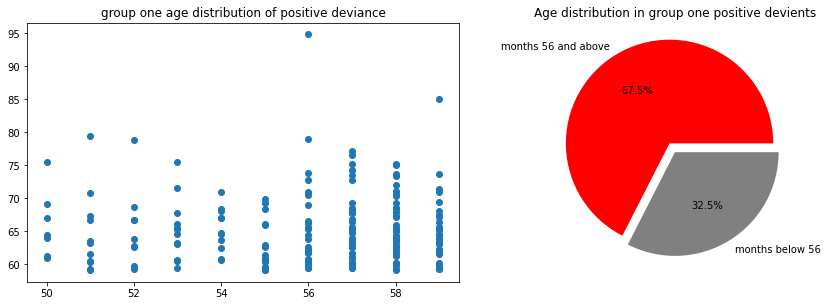

In [258]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.scatter(positive_1[['child_age','child_total_elom']].child_age,positive_1[['child_age','child_total_elom']].child_total_elom)
axes2.pie(x = [positive_1[positive_1.child_age>= 56].shape[0],positive_1[positive_1.child_age< 56].shape[0]], labels=labels, colors=['red','grey'],autopct='%1.1f%%', explode = [0.1,0])
axes1.set_title('group one age distribution of positive deviance')
axes2.set_title('Age distribution in group one positive devients')

Text(0.5, 1.0, 'Age distribution in group two positive devients')

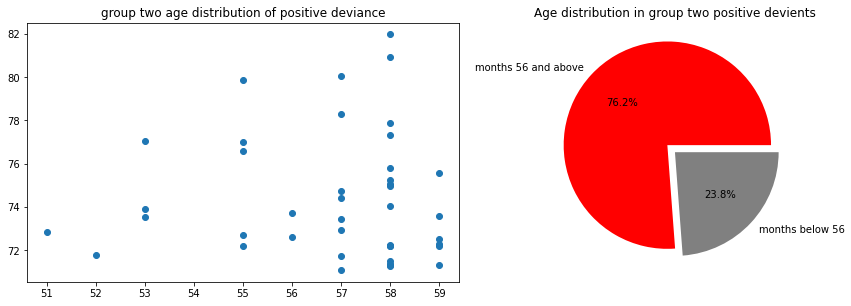

In [259]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.scatter(positive_2[['child_age','child_total_elom']].child_age,positive_2[['child_age','child_total_elom']].child_total_elom)
axes2.pie(x = [positive_2[positive_2.child_age>= 56].shape[0],positive_2[positive_2.child_age< 56].shape[0]],autopct='%1.1f%%', labels=labels, colors=['red','grey'], explode = [0.1,0])
axes1.set_title('group two age distribution of positive deviance')
axes2.set_title('Age distribution in group two positive devients')

Text(0.5, 1.0, 'Age distribution in group three positive devients')

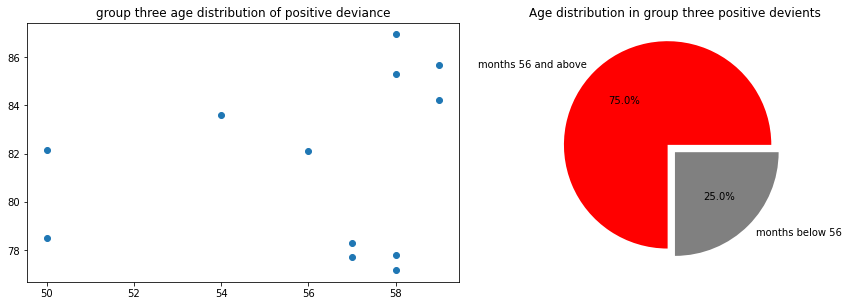

In [260]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.scatter(positive_3[['child_age','child_total_elom']].child_age,positive_3[['child_age','child_total_elom']].child_total_elom)
axes2.pie(x = [positive_3[positive_3.child_age>= 56].shape[0],positive_3[positive_3.child_age< 56].shape[0]],autopct='%1.1f%%', labels=labels, colors=['red','grey'], explode = [0.1,0])
axes1.set_title('group three age distribution of positive deviance')
axes2.set_title('Age distribution in group three positive devients')

### Note:
>1. Age affect positive deviance
>2. Most people who are positive devient are 56 months old and above


# Gender

Text(0.5, 1.0, 'Gender distribution in group one positive devients')

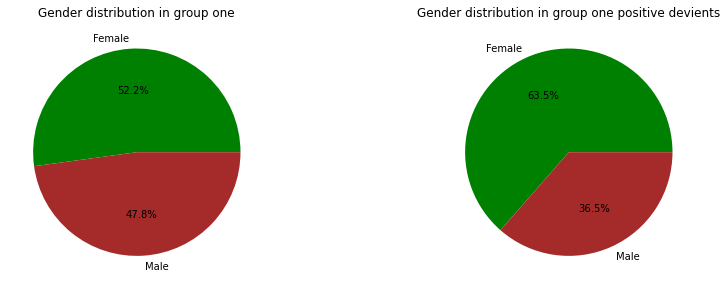

In [261]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.pie(x = pd.DataFrame(group_one.child_gender.value_counts()).child_gender.to_list(),labels = pd.DataFrame(group_one.child_gender.value_counts()).index, autopct='%1.1f%%', colors = ['green','brown'])
axes2.pie(x = pd.DataFrame(positive_1.child_gender.value_counts()).child_gender.to_list(),labels = pd.DataFrame(positive_1.child_gender.value_counts()).index, autopct='%1.1f%%', colors = ['green','brown'])
axes1.set_title('Gender distribution in group one')
axes2.set_title('Gender distribution in group one positive devients')

Text(0.5, 1.0, 'Gender distribution in group two positive devients')

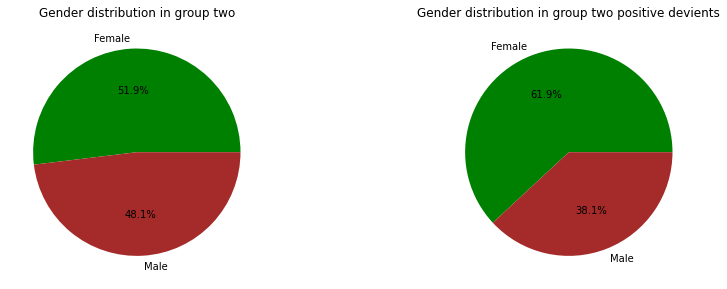

In [262]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.pie(x = pd.DataFrame(group_two.child_gender.value_counts()).child_gender.to_list(),labels = pd.DataFrame(group_two.child_gender.value_counts()).index, autopct='%1.1f%%', colors = ['green','brown'])
axes2.pie(x = pd.DataFrame(positive_2.child_gender.value_counts()).child_gender.to_list(),labels = pd.DataFrame(positive_2.child_gender.value_counts()).index, autopct='%1.1f%%', colors = ['green','brown'])
axes1.set_title('Gender distribution in group two')
axes2.set_title('Gender distribution in group two positive devients')

Text(0.5, 1.0, 'Gender distribution in group Three positive devients')

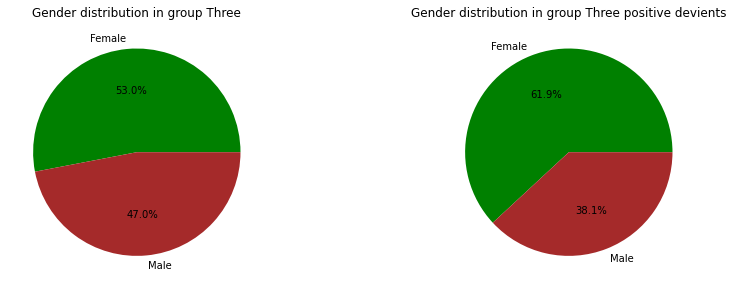

In [263]:
fig = plt.figure()
axes1 = fig.add_axes([0.9,0.1,1,0.9])
axes2 = fig.add_axes([0.9,0.1,3,0.9])
axes1.pie(x = pd.DataFrame(group_three.child_gender.value_counts()).child_gender.to_list(), autopct='%1.1f%%', labels = pd.DataFrame(group_three.child_gender.value_counts()).index, colors = ['green','brown'])
axes2.pie(x = pd.DataFrame(positive_2.child_gender.value_counts()).child_gender.to_list(), autopct='%1.1f%%', labels = pd.DataFrame(positive_2.child_gender.value_counts()).index, colors = ['green','brown'])
axes1.set_title('Gender distribution in group Three')
axes2.set_title('Gender distribution in group Three positive devients')

> -  Most females thrive as positive deviance than male
> - We can see that from all these three groups, female are more than males interms of positive deviance

# grants

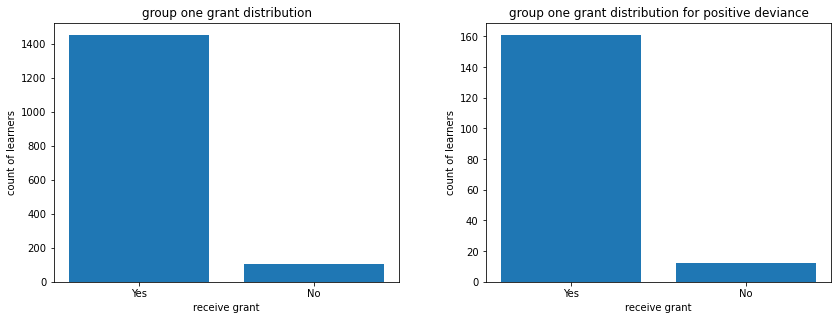

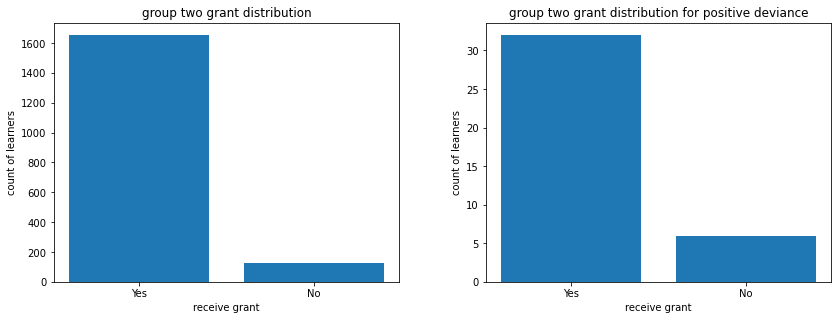

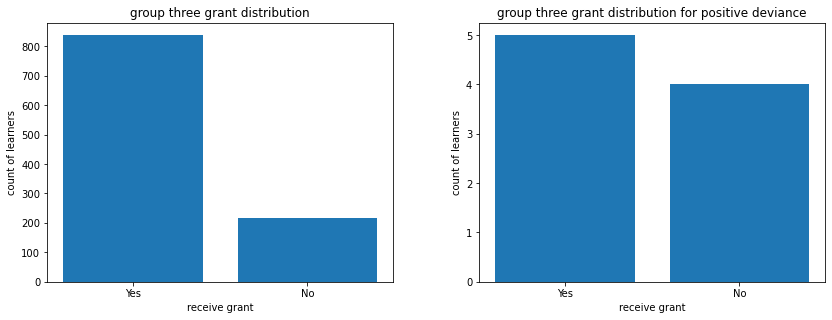

In [234]:
#group one
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.9])
axes2 = fig.add_axes([1.1,0.1,0.8,0.9])
axes1.bar(pd.DataFrame(group_one.child_grant.value_counts()).index,pd.DataFrame(group_one.child_grant.value_counts()).child_grant)
axes2.bar(pd.DataFrame(positive_1.child_grant.value_counts()).index,pd.DataFrame(positive_1.child_grant.value_counts()).child_grant)

axes2.set_title('group one grant distribution for positive deviance')
axes2.set_xlabel('receive grant')
axes2.set_ylabel('count of learners')

axes1.set_title('group one grant distribution')
axes1.set_xlabel('receive grant')
axes1.set_ylabel('count of learners')
plt.show()

#group two
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.9])
axes2 = fig.add_axes([1.1,0.1,0.8,0.9])
axes1.bar(pd.DataFrame(group_two.child_grant.value_counts()).index,pd.DataFrame(group_two.child_grant.value_counts()).child_grant)
axes2.bar(pd.DataFrame(positive_2.child_grant.value_counts()).index,pd.DataFrame(positive_2.child_grant.value_counts()).child_grant)

axes2.set_title('group two grant distribution for positive deviance')
axes2.set_xlabel('receive grant')
axes2.set_ylabel('count of learners')

axes1.set_title('group two grant distribution')
axes1.set_xlabel('receive grant')
axes1.set_ylabel('count of learners')
plt.show()


#group three
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.9])
axes2 = fig.add_axes([1.1,0.1,0.8,0.9])
axes1.bar(pd.DataFrame(group_three.child_grant.value_counts()).index,pd.DataFrame(group_three.child_grant.value_counts()).child_grant)
axes2.bar(pd.DataFrame(positive_3.child_grant.value_counts()).index,pd.DataFrame(positive_3.child_grant.value_counts()).child_grant)

axes2.set_title('group three grant distribution for positive deviance')
axes2.set_xlabel('receive grant')
axes2.set_ylabel('count of learners')

axes1.set_title('group three grant distribution')
axes1.set_xlabel('receive grant')
axes1.set_ylabel('count of learners')
plt.show()

# Attention, Concentration, delligence, interested for positive deviance

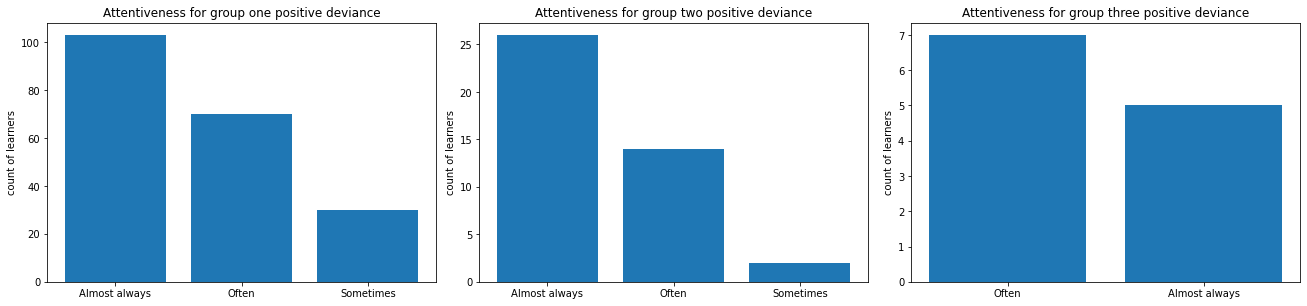

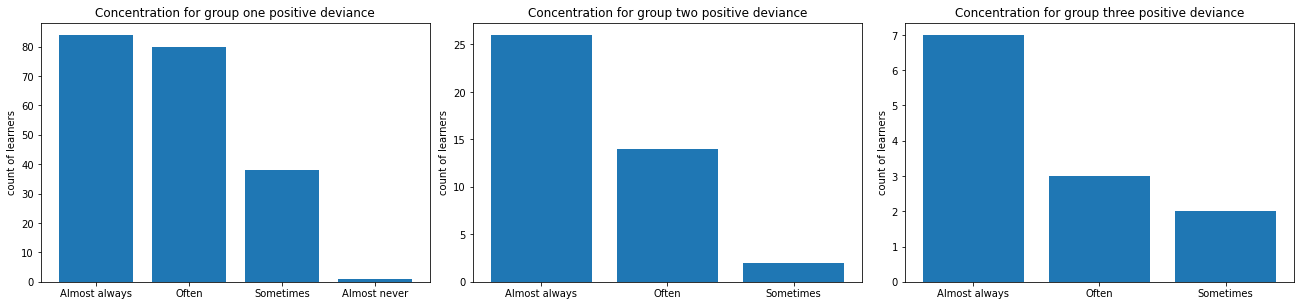

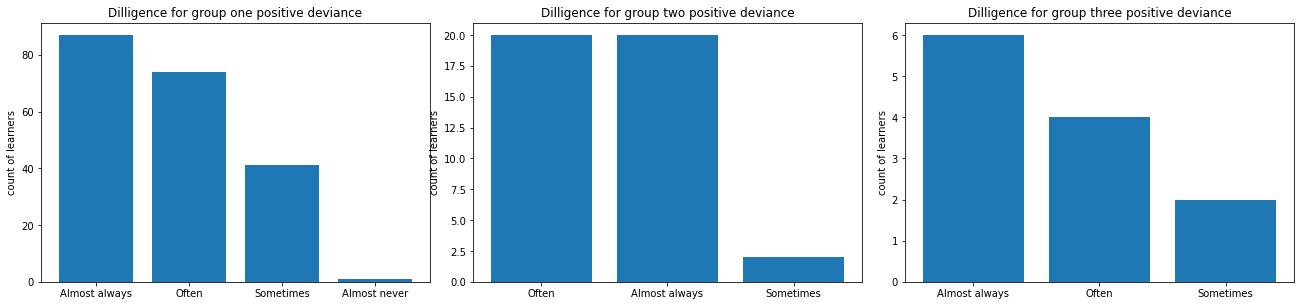

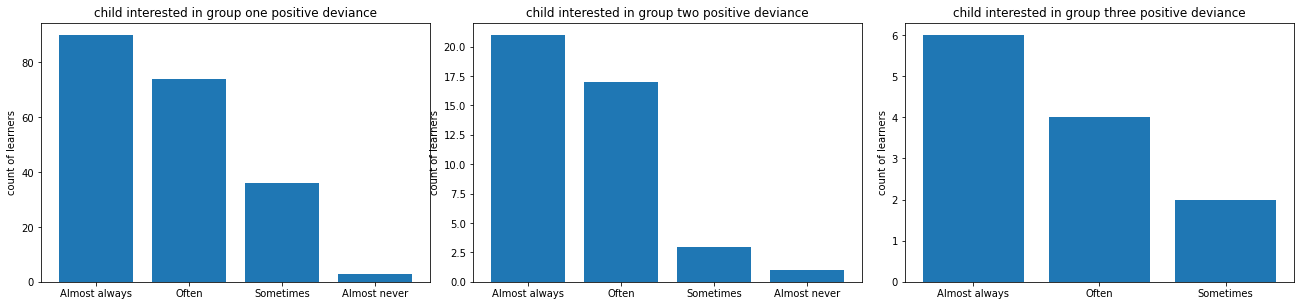

In [248]:
#attention
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(positive_1.child_observe_attentive.value_counts()).index, pd.DataFrame(positive_1.child_observe_attentive.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(positive_2.child_observe_attentive.value_counts()).index, pd.DataFrame(positive_2.child_observe_attentive.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(positive_3.child_observe_attentive.value_counts()).index, pd.DataFrame(positive_3.child_observe_attentive.value_counts()).values.flatten())

axes1.set_title('Attentiveness for group one positive deviance')
axes1.set_ylabel('count of learners')
axes2.set_title('Attentiveness for group two positive deviance')
axes2.set_ylabel('count of learners')
axes3.set_title('Attentiveness for group three positive deviance')
axes3.set_ylabel('count of learners')
plt.show()


#concentration
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(positive_1.child_observe_concentrated.value_counts()).index, pd.DataFrame(positive_1.child_observe_concentrated.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(positive_2.child_observe_concentrated.value_counts()).index, pd.DataFrame(positive_2.child_observe_concentrated.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(positive_3.child_observe_concentrated.value_counts()).index, pd.DataFrame(positive_3.child_observe_concentrated.value_counts()).values.flatten())

axes1.set_title('Concentration for group one positive deviance')
axes1.set_ylabel('count of learners')
axes2.set_title('Concentration for group two positive deviance')
axes2.set_ylabel('count of learners')
axes3.set_title('Concentration for group three positive deviance')
axes3.set_ylabel('count of learners')
plt.show()

#dilligence
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(positive_1.child_observe_diligent.value_counts()).index, pd.DataFrame(positive_1.child_observe_diligent.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(positive_2.child_observe_diligent.value_counts()).index, pd.DataFrame(positive_2.child_observe_diligent.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(positive_3.child_observe_diligent.value_counts()).index, pd.DataFrame(positive_3.child_observe_diligent.value_counts()).values.flatten())

axes1.set_title('Dilligence for group one positive deviance')
axes1.set_ylabel('count of learners')
axes2.set_title('Dilligence for group two positive deviance')
axes2.set_ylabel('count of learners')
axes3.set_title('Dilligence for group three positive deviance')
axes3.set_ylabel('count of learners')
plt.show()

#interested
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(positive_1.child_observe_interested.value_counts()).index, pd.DataFrame(positive_1.child_observe_interested.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(positive_2.child_observe_interested.value_counts()).index, pd.DataFrame(positive_2.child_observe_interested.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(positive_3.child_observe_interested.value_counts()).index, pd.DataFrame(positive_3.child_observe_interested.value_counts()).values.flatten())

axes1.set_title('child interested in group one positive deviance')
axes1.set_ylabel('count of learners')
axes2.set_title('child interested in group two positive deviance')
axes2.set_ylabel('count of learners')
axes3.set_title('child interested in group three positive deviance')
axes3.set_ylabel('count of learners')
plt.show()

# Attention, Concentration, delligence, interested for the whole dataset

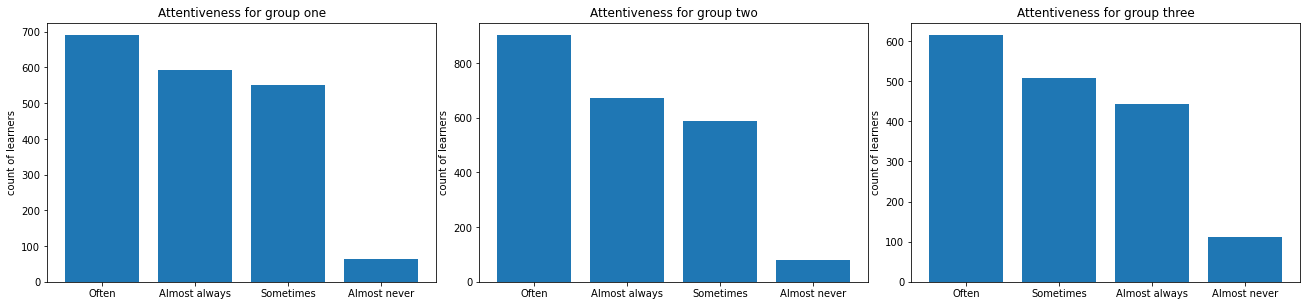

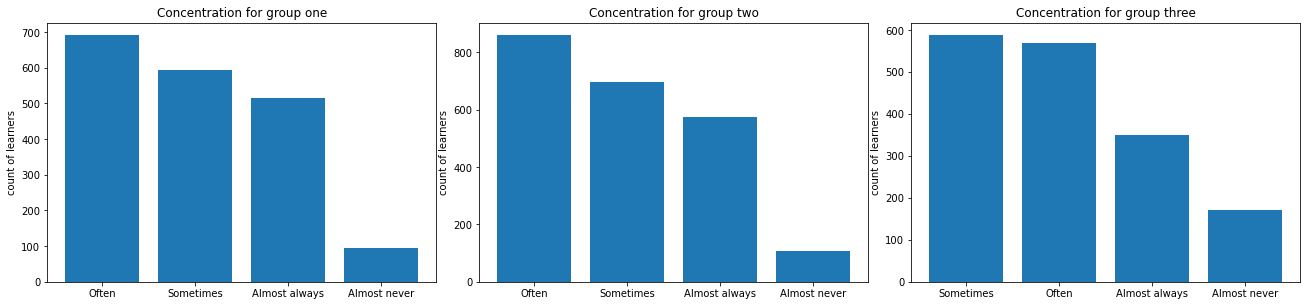

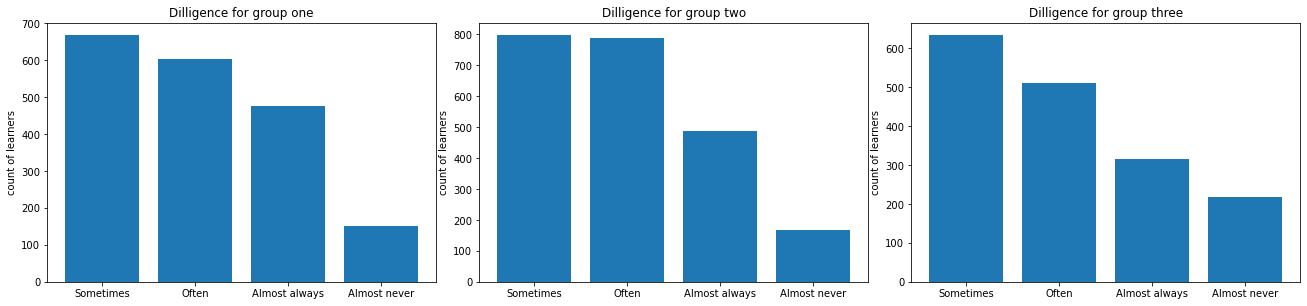

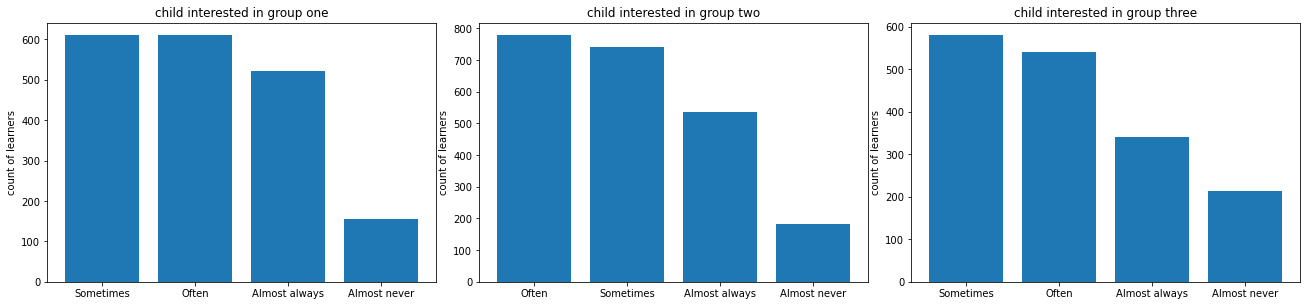

In [251]:
#attention
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(group_one.child_observe_attentive.value_counts()).index, pd.DataFrame(group_one.child_observe_attentive.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(group_two.child_observe_attentive.value_counts()).index, pd.DataFrame(group_two.child_observe_attentive.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(group_three.child_observe_attentive.value_counts()).index, pd.DataFrame(group_three.child_observe_attentive.value_counts()).values.flatten())

axes1.set_title('Attentiveness for group one')
axes1.set_ylabel('count of learners')
axes2.set_title('Attentiveness for group two')
axes2.set_ylabel('count of learners')
axes3.set_title('Attentiveness for group three')
axes3.set_ylabel('count of learners')
plt.show()


#concentration
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(group_one.child_observe_concentrated.value_counts()).index, pd.DataFrame(group_one.child_observe_concentrated.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(group_two.child_observe_concentrated.value_counts()).index, pd.DataFrame(group_two.child_observe_concentrated.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(group_three.child_observe_concentrated.value_counts()).index, pd.DataFrame(group_three.child_observe_concentrated.value_counts()).values.flatten())

axes1.set_title('Concentration for group one')
axes1.set_ylabel('count of learners')
axes2.set_title('Concentration for group two')
axes2.set_ylabel('count of learners')
axes3.set_title('Concentration for group three')
axes3.set_ylabel('count of learners')
plt.show()

#dilligence
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(group_one.child_observe_diligent.value_counts()).index, pd.DataFrame(group_one.child_observe_diligent.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(group_two.child_observe_diligent.value_counts()).index, pd.DataFrame(group_two.child_observe_diligent.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(group_three.child_observe_diligent.value_counts()).index, pd.DataFrame(group_three.child_observe_diligent.value_counts()).values.flatten())

axes1.set_title('Dilligence for group one')
axes1.set_ylabel('count of learners')
axes2.set_title('Dilligence for group two')
axes2.set_ylabel('count of learners')
axes3.set_title('Dilligence for group three')
axes3.set_ylabel('count of learners')
plt.show()

#interested
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.3,0.9,0.9])
axes2 = fig.add_axes([1.1,0.3,0.9,0.9])
axes3 = fig.add_axes([2.1,0.3,0.9,0.9])
axes1.bar(pd.DataFrame(group_one.child_observe_interested.value_counts()).index, pd.DataFrame(group_one.child_observe_interested.value_counts()).values.flatten())
axes2.bar(pd.DataFrame(group_two.child_observe_interested.value_counts()).index, pd.DataFrame(group_two.child_observe_interested.value_counts()).values.flatten())
axes3.bar(pd.DataFrame(group_three.child_observe_interested.value_counts()).index, pd.DataFrame(group_three.child_observe_interested.value_counts()).values.flatten())

axes1.set_title('child interested in group one')
axes1.set_ylabel('count of learners')
axes2.set_title('child interested in group two')
axes2.set_ylabel('count of learners')
axes3.set_title('child interested in group three')
axes3.set_ylabel('count of learners')
plt.show()

# 1. province

### a). mean elom score for all the three groups

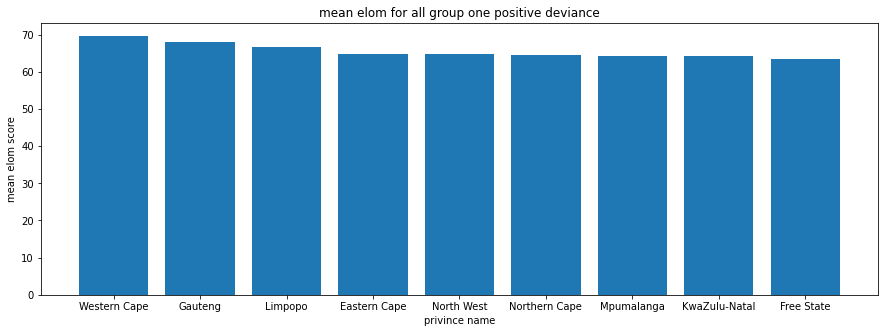

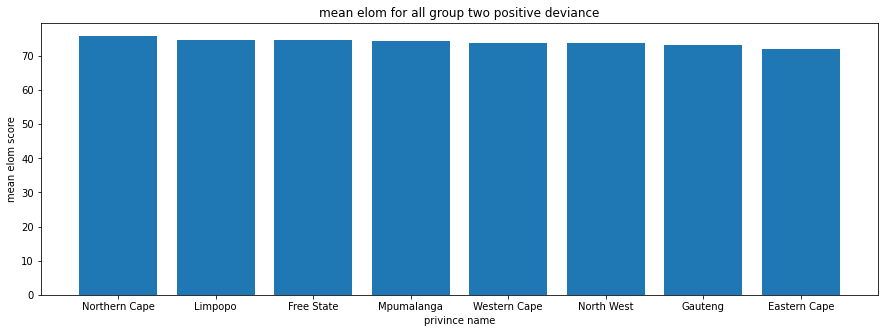

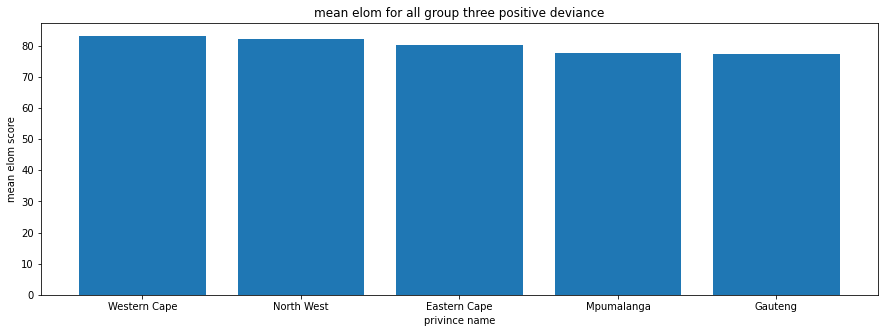

In [257]:
plt.figure(figsize = (15,5))
plt.bar(positive_1[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].index,  positive_1[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].child_total_elom)
plt.xlabel('privince name')
plt.ylabel('mean elom score')
plt.title('mean elom for all group one positive deviance')
plt.show()

plt.figure(figsize = (15,5))
plt.bar(positive_2[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].index,  positive_2[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].child_total_elom)
plt.xlabel('privince name')
plt.ylabel('mean elom score')
plt.title('mean elom for all group two positive deviance')
plt.show()

plt.figure(figsize = (15,5))
plt.bar(positive_3[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].index,  positive_3[['prov_best','child_total_elom']].groupby(by='prov_best').mean().sort_values(by='child_total_elom')[::-1].child_total_elom)
plt.xlabel('privince name')
plt.ylabel('mean elom score')
plt.title('mean elom for all group three positive deviance')
plt.show()

### b). Percentage with distribution of population

Hypothesis:: The more the population, the higher posibility of positive deviance

In [41]:
# checking population

In [42]:
population_check1 = group_one[['child_id','prov_best']].groupby(by='prov_best').count().sort_values(by='child_id')[::-1]
population_check1['total_positive'] = [59,38,34,28,27,5,4,5,3]
population_check1['percentage'] = (population_check1.total_positive/population_check1.child_id)*100
population_check1.sort_values(by='percentage')[::-1]

,child_id,total_positive,percentage
prov_best,,,
Western Cape,111,27,24.324324
Mpumalanga,150,28,18.666667
Gauteng,18,3,16.666667
Eastern Cape,480,59,12.291667
North West,62,5,8.064516
Northern Cape,474,38,8.016878
KwaZulu-Natal,456,34,7.456140
Limpopo,63,4,6.349206
Free State,84,5,5.952381


In [43]:
#group two

In [44]:
population_check2 = group_two[['child_id','prov_best']].groupby(by='prov_best').count().sort_values(by='child_id')[::-1]
population_check2['total_positive'] = [7,11,11,3,4,4,0,2,2]
population_check2['percentage'] = (population_check2.total_positive/population_check2.child_id)*100
population_check2.sort_values(by='percentage')[::-1]

,child_id,total_positive,percentage
prov_best,,,
Eastern Cape,40,2,5.000000
Mpumalanga,321,11,3.426791
Gauteng,59,2,3.389831
Free State,389,11,2.827763
Western Cape,151,4,2.649007
Northern Cape,196,4,2.040816
North West,261,3,1.149425
Limpopo,721,7,0.970874
KwaZulu-Natal,102,0,0.000000


In [45]:
# group 3

In [46]:
population_check3 = group_three[['child_id','prov_best']].groupby(by='prov_best').count().sort_values(by='child_id')[::-1]
population_check3['total_positive'] = [0,0,2,1,0,7,0,0,2]
population_check3['percentage'] = (population_check3.total_positive/population_check3.child_id)*100
population_check3.sort_values(by='percentage')[::-1]

,child_id,total_positive,percentage
prov_best,,,
Northern Cape,54,7,12.962963
Free State,35,2,5.714286
Limpopo,315,2,0.634921
Mpumalanga,261,1,0.383142
KwaZulu-Natal,35,0,0.000000
Eastern Cape,36,0,0.000000
North West,167,0,0.000000
Gauteng,319,0,0.000000
Western Cape,455,0,0.000000


Note
> Western cape, Mpumalanga, Gauteng and Eastern Cape have a hinger percentage of positive deviance

2. Total number of province showing positive deviance

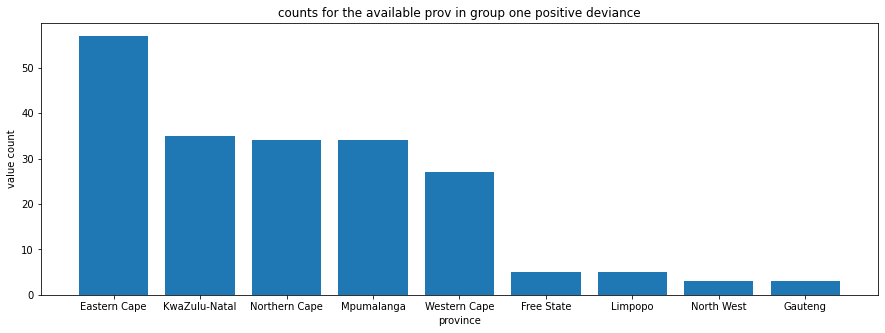

In [48]:
#group one
plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_1.prov_best.value_counts()).index,pd.DataFrame(positive_1.prov_best.value_counts()).prov_best)
plt.title('counts for the available prov in group one positive deviance')
plt.ylabel('value count')
plt.xlabel('province')
plt.show()

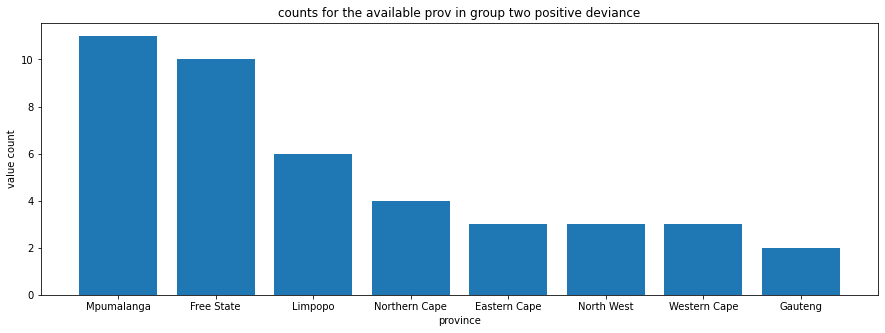

In [49]:
#group two
plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_2.prov_best.value_counts()).index,pd.DataFrame(positive_2.prov_best.value_counts()).prov_best)
plt.title('counts for the available prov in group two positive deviance')
plt.ylabel('value count')
plt.xlabel('province')
plt.show()

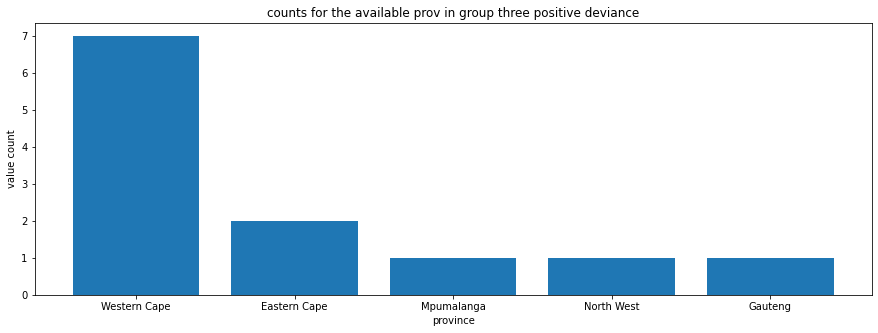

In [50]:
#group three
plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_3.prov_best.value_counts()).index,pd.DataFrame(positive_3.prov_best.value_counts()).prov_best)
plt.title('counts for the available prov in group three positive deviance')
plt.ylabel('value count')
plt.xlabel('province')
plt.show()

3. Subsidy

In [51]:
positive_1[['prov_subsidy_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_subsidy_m')[::-1]

,prov_subsidy_m
prov_best,
Free State,0.570672
Eastern Cape,0.437392
KwaZulu-Natal,0.422698
Limpopo,0.404623
Northern Cape,0.375780
Mpumalanga,0.366486
North West,0.212340
Western Cape,0.206020
Gauteng,0.152293


In [52]:
positive_2[['prov_subsidy_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_subsidy_m')[::-1]

,prov_subsidy_m
prov_best,
Free State,0.570672
Eastern Cape,0.437392
Limpopo,0.404623
Northern Cape,0.375780
Mpumalanga,0.366486
North West,0.212340
Western Cape,0.206020
Gauteng,0.152293


In [53]:
positive_3[['prov_subsidy_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_subsidy_m')[::-1]

,prov_subsidy_m
prov_best,
Eastern Cape,0.437392
Mpumalanga,0.366486
North West,0.212340
Western Cape,0.206020
Gauteng,0.152293


4. transport

In [54]:
positive_1[['prov_transport_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_transport_m')[::-1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

,prov_transport_m
prov_best,
Western Cape,0.188927
Gauteng,0.157395
Northern Cape,0.090347
Free State,0.082940
North West,0.077020
Mpumalanga,0.076187
Limpopo,0.074267
KwaZulu-Natal,0.049904
Eastern Cape,0.048002


In [55]:
positive_2[['prov_transport_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_transport_m')[::-1]

,prov_transport_m
prov_best,
Western Cape,0.188927
Gauteng,0.157395
Northern Cape,0.090347
Free State,0.082940
North West,0.077020
Mpumalanga,0.076187
Limpopo,0.074267
Eastern Cape,0.048002


In [56]:
positive_3[['prov_transport_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_transport_m')[::-1]

,prov_transport_m
prov_best,
Western Cape,0.188927
Gauteng,0.157395
North West,0.077020
Mpumalanga,0.076187
Eastern Cape,0.048002


### 

5.  bank

In [57]:
positive_1[['prov_bank_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_bank_m')[::-1]

,prov_bank_m
prov_best,
Free State,0.833597
Limpopo,0.795946
Eastern Cape,0.787291
Mpumalanga,0.756374
KwaZulu-Natal,0.742434
Northern Cape,0.733251
Gauteng,0.726172
Western Cape,0.699536
North West,0.670445


In [58]:
positive_2[['prov_bank_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_bank_m')[::-1]

,prov_bank_m
prov_best,
Free State,0.833597
Limpopo,0.795946
Eastern Cape,0.787291
Mpumalanga,0.756374
Northern Cape,0.733251
Gauteng,0.726172
Western Cape,0.699536
North West,0.670445


In [59]:
positive_3[['prov_bank_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_bank_m')[::-1]

,prov_bank_m
prov_best,
Eastern Cape,0.787291
Mpumalanga,0.756374
Gauteng,0.726172
Western Cape,0.699536
North West,0.670445


6. firstaid

In [60]:
positive_1[['prov_firstaid_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_firstaid_m')[::-1]

,prov_firstaid_m
prov_best,
Western Cape,0.863845
Gauteng,0.797669
Free State,0.603476
Mpumalanga,0.561341
Northern Cape,0.561250
North West,0.533389
KwaZulu-Natal,0.492662
Limpopo,0.483281
Eastern Cape,0.435065


In [61]:
positive_2[['prov_firstaid_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_firstaid_m')[::-1]

,prov_firstaid_m
prov_best,
Western Cape,0.863845
Gauteng,0.797669
Free State,0.603476
Mpumalanga,0.561341
Northern Cape,0.561250
North West,0.533389
Limpopo,0.483281
Eastern Cape,0.435065


In [62]:
positive_3[['prov_firstaid_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_firstaid_m')[::-1]

,prov_firstaid_m
prov_best,
Western Cape,0.863845
Gauteng,0.797669
Mpumalanga,0.561341
North West,0.533389
Eastern Cape,0.435065


7. Separated

In [63]:
positive_1[['prov_separate_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_separate_m')[::-1]

,prov_separate_m
prov_best,
Gauteng,1.678771
Free State,1.677419
Western Cape,1.625977
Limpopo,1.611079
Mpumalanga,1.596894
North West,1.503967
Northern Cape,1.472839
KwaZulu-Natal,1.331200
Eastern Cape,1.120486


In [64]:
positive_2[['prov_separate_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_separate_m')[::-1]

,prov_separate_m
prov_best,
Gauteng,1.678771
Free State,1.677419
Western Cape,1.625977
Limpopo,1.611079
Mpumalanga,1.596894
North West,1.503967
Northern Cape,1.472839
Eastern Cape,1.120486


In [65]:
positive_3[['prov_separate_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_separate_m')[::-1]

,prov_separate_m
prov_best,
Gauteng,1.678771
Western Cape,1.625977
Mpumalanga,1.596894
North West,1.503967
Eastern Cape,1.120486


8. meals

In [66]:
positive_1[['prov_meals_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_meals_m')[::-1]

,prov_meals_m
prov_best,
Limpopo,0.984429
Mpumalanga,0.983433
North West,0.980400
Gauteng,0.979614
Eastern Cape,0.976064
Free State,0.973479
KwaZulu-Natal,0.972780
Western Cape,0.960496
Northern Cape,0.918519


In [67]:
positive_2[['prov_meals_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_meals_m')[::-1]

,prov_meals_m
prov_best,
Limpopo,0.984429
Mpumalanga,0.983433
North West,0.980400
Gauteng,0.979614
Eastern Cape,0.976064
Free State,0.973479
Western Cape,0.960496
Northern Cape,0.918519


In [68]:
positive_3[['prov_meals_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_meals_m')[::-1]

,prov_meals_m
prov_best,
Mpumalanga,0.983433
North West,0.980400
Gauteng,0.979614
Eastern Cape,0.976064
Western Cape,0.960496


10. Aftercare

In [69]:
positive_1[['prov_aftercare_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_aftercare_m')[::-1]

,prov_aftercare_m
prov_best,
Gauteng,0.396844
Western Cape,0.328276
Mpumalanga,0.217790
North West,0.202505
Eastern Cape,0.170690
KwaZulu-Natal,0.159012
Free State,0.157648
Northern Cape,0.141975
Limpopo,0.130267


In [70]:
positive_2[['prov_aftercare_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_aftercare_m')[::-1]

,prov_aftercare_m
prov_best,
Gauteng,0.396844
Western Cape,0.328276
Mpumalanga,0.217790
North West,0.202505
Eastern Cape,0.170690
Free State,0.157648
Northern Cape,0.141975
Limpopo,0.130267


In [71]:
positive_3[['prov_aftercare_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_aftercare_m')[::-1]

,prov_aftercare_m
prov_best,
Gauteng,0.396844
Western Cape,0.328276
Mpumalanga,0.217790
North West,0.202505
Eastern Cape,0.170690


11.space

In [72]:
positive_1[['prov_space_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_space_m')[::-1]

,prov_space_m
prov_best,
Mpumalanga,0.872460
Gauteng,0.872104
North West,0.865585
Free State,0.839613
Western Cape,0.836897
KwaZulu-Natal,0.810458
Northern Cape,0.806530
Limpopo,0.798429
Eastern Cape,0.756221


In [73]:
positive_2[['prov_space_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_space_m')[::-1]

,prov_space_m
prov_best,
Mpumalanga,0.872460
Gauteng,0.872104
North West,0.865585
Free State,0.839613
Western Cape,0.836897
Northern Cape,0.806530
Limpopo,0.798429
Eastern Cape,0.756221


In [74]:
positive_3[['prov_space_m','prov_best']].groupby(by='prov_best').mean().sort_values(by='prov_space_m')[::-1]

,prov_space_m
prov_best,
Mpumalanga,NaN
Gauteng,0.872104
North West,0.865585
Western Cape,0.836897
Eastern Cape,0.756221


# District

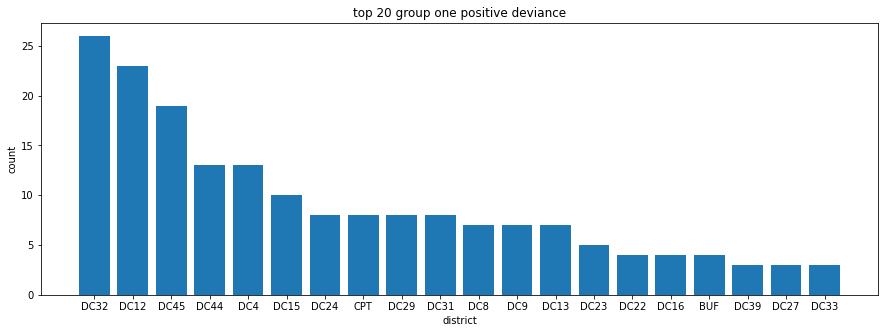

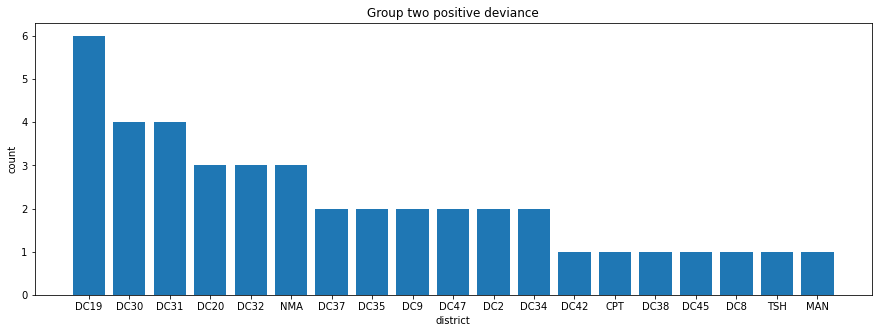

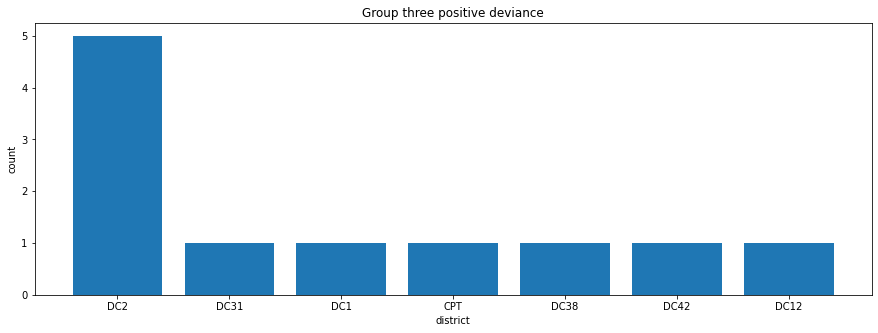

In [75]:
plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_1.id_dc_best.value_counts())[:20].index, pd.DataFrame(positive_1.id_dc_best.value_counts())[:20].id_dc_best)
plt.title('top 20 group one positive deviance')
plt.xlabel('district')
plt.ylabel('count')
plt.show()


plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_2.id_dc_best.value_counts())[:20].index, pd.DataFrame(positive_2.id_dc_best.value_counts())[:20].id_dc_best)
plt.title('Group two positive deviance')
plt.xlabel('district')
plt.ylabel('count')
plt.show()


plt.figure(figsize = (15,5))
plt.bar(pd.DataFrame(positive_3.id_dc_best.value_counts())[:20].index, pd.DataFrame(positive_3.id_dc_best.value_counts())[:20].id_dc_best)
plt.title('Group three positive deviance')
plt.xlabel('district')
plt.ylabel('count')
plt.show()

# enumeraator

In [76]:
en_1 = pd.DataFrame(positive_1.id_enumerator.value_counts()).iloc[:20]
en_1.columns = ['count of learners']
print('Goup one positive deviance')
en_1

Goup one positive deviance


,count of learners
2683.0,24
1394.0,14
2681.0,10
502.0,10
545.0,10
484.0,10
2799.0,9
344.0,8
20011.0,8
755.0,6


In [77]:
en_2 = pd.DataFrame(positive_2.id_enumerator.value_counts()).iloc[:20]
en_2.columns = ['count of learners']
print('Goup two positive deviance')
en_2

Goup two positive deviance


,count of learners
563.0,8
2762.0,4
2983.0,4
1394.0,3
20020.0,2
1732.0,2
1301.0,2
2683.0,2
562.0,2
2691.0,1


In [78]:
en_3 = pd.DataFrame(positive_3.id_enumerator.value_counts()).iloc[:20]
en_3.columns = ['count of learners']
print('Goup three positive deviance')
en_3

Goup three positive deviance


,count of learners
20009.0,4
20016.0,1
20089.0,1
20030.0,1
20050.0,1
562.0,1
2985.0,1
2681.0,1
755.0,1


# language of the child

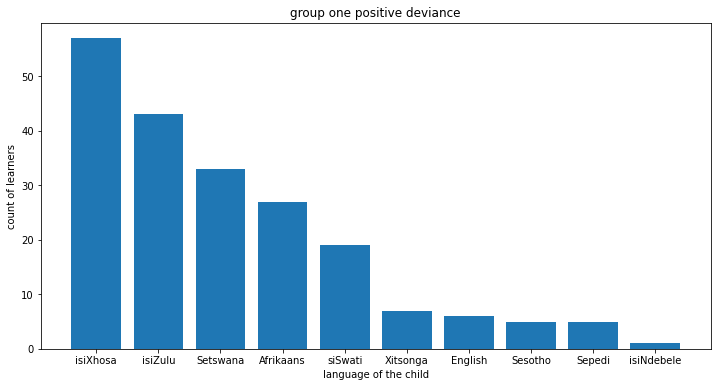

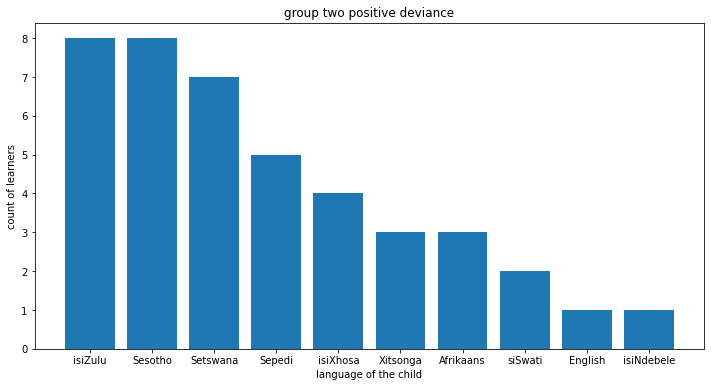

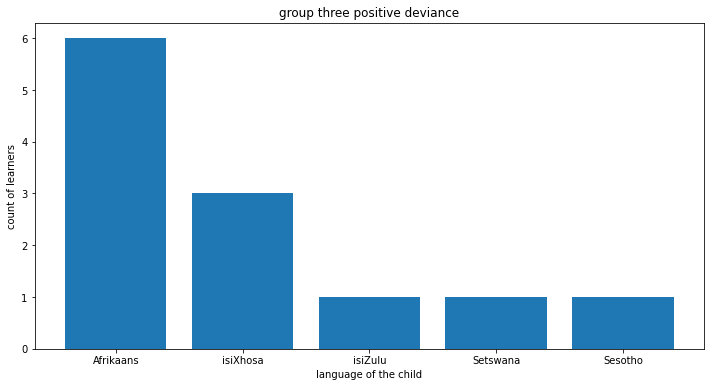

In [79]:
plt.figure(figsize = (12,6))
plt.bar(pd.DataFrame(positive_1.language_child.value_counts()).index, positive_1.language_child.value_counts())
plt.title('group one positive deviance')
plt.xlabel('language of the child')
plt.ylabel('count of learners')
plt.show()


plt.figure(figsize = (12,6))
plt.bar(pd.DataFrame(positive_2.language_child.value_counts()).index, positive_2.language_child.value_counts())
plt.title('group two positive deviance')
plt.xlabel('language of the child')
plt.ylabel('count of learners')
plt.show()

plt.figure(figsize = (12,6))
plt.bar(pd.DataFrame(positive_3.language_child.value_counts()).index, positive_3.language_child.value_counts())
plt.title('group three positive deviance')
plt.xlabel('language of the child')
plt.ylabel('count of learners')
plt.show()

# water

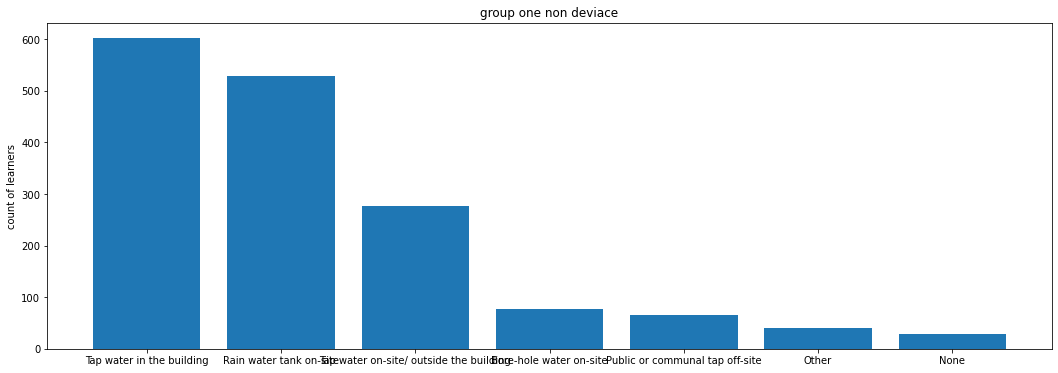

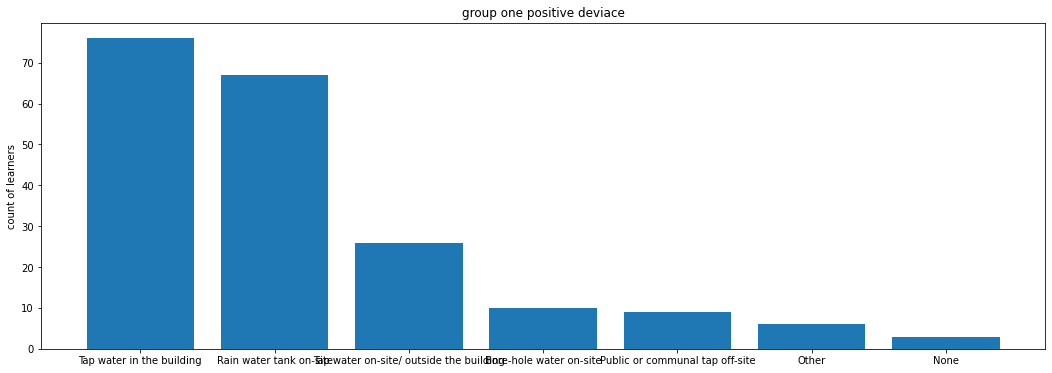

In [82]:
plt.figure(figsize = (18,6))
plt.bar(pd.DataFrame(non_1.obs_water.value_counts()).index, pd.DataFrame(non_1.obs_water.value_counts()).obs_water)
plt.title('group one non deviace')
plt.ylabel('count of learners')
plt.show()

plt.figure(figsize = (18,6))
plt.bar(pd.DataFrame(positive_1.obs_water.value_counts()).index, pd.DataFrame(positive_1.obs_water.value_counts()).obs_water)
plt.title('group one positive deviace')
plt.ylabel('count of learners')
plt.show()

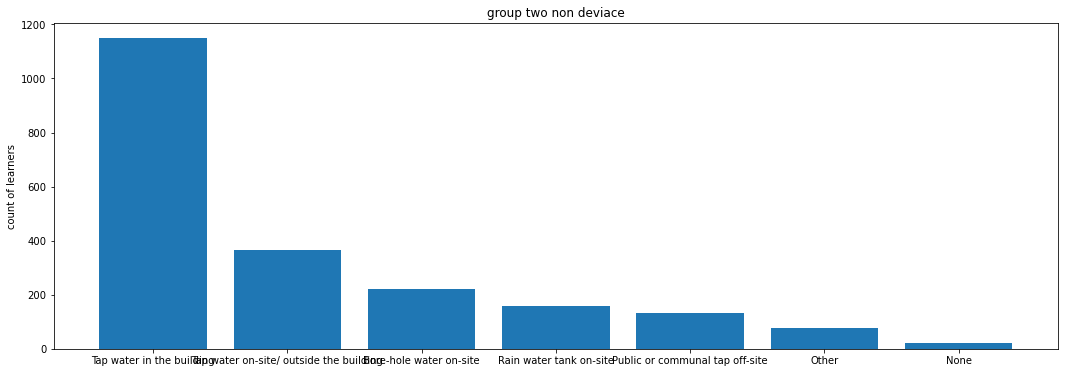

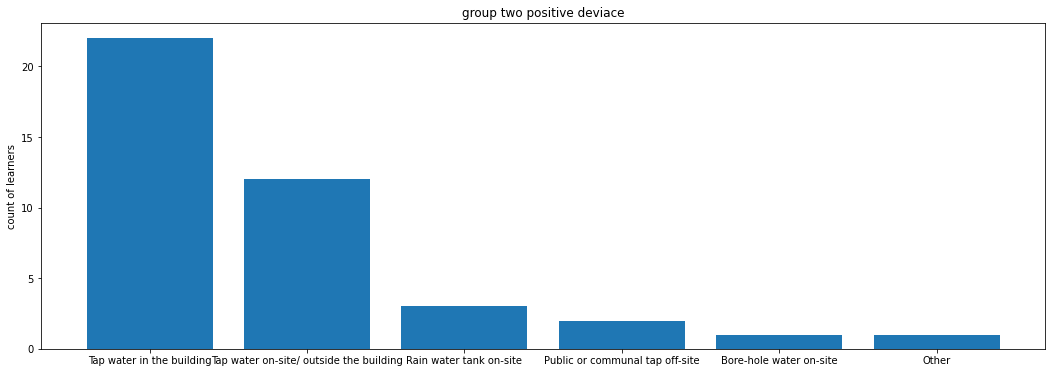

In [83]:
plt.figure(figsize = (18,6))
plt.bar(pd.DataFrame(non_2.obs_water.value_counts()).index, pd.DataFrame(non_2.obs_water.value_counts()).obs_water)
plt.title('group two non deviace')
plt.ylabel('count of learners')
plt.show()

plt.figure(figsize = (18,6))
plt.bar(pd.DataFrame(positive_2.obs_water.value_counts()).index, pd.DataFrame(positive_2.obs_water.value_counts()).obs_water)
plt.title('group two positive deviace')
plt.ylabel('count of learners')
plt.show()

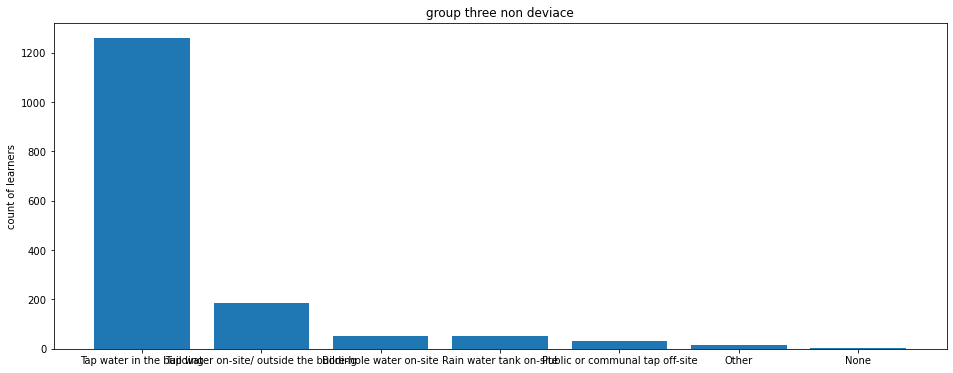

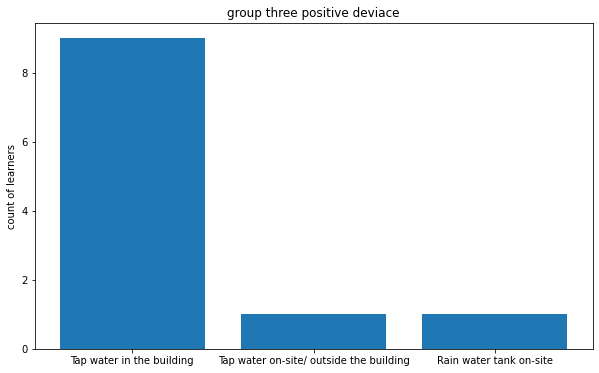

In [84]:
plt.figure(figsize = (16,6))
plt.bar(pd.DataFrame(non_3.obs_water.value_counts()).index, pd.DataFrame(non_3.obs_water.value_counts()).obs_water)
plt.title('group three non deviace')
plt.ylabel('count of learners')
plt.show()

plt.figure(figsize = (10,6))
plt.bar(pd.DataFrame(positive_3.obs_water.value_counts()).index, pd.DataFrame(positive_3.obs_water.value_counts()).obs_water)
plt.title('group three positive deviace')
plt.ylabel('count of learners')
plt.show()

# clossing time

In [85]:
ct_1 = pd.DataFrame(positive_1['pri_time_close_hours'].value_counts())
ct_1.columns = ['total number of learners']
print('group one positive deviance')
ct_1

group one positive deviance


,total number of learners
14,55
15,55
13,46
16,24
12,11
17,2


In [86]:
ct_2 = pd.DataFrame(positive_2['pri_time_close_hours'].value_counts())
ct_2.columns = ['total number of learners']
print('group two positive deviance')
ct_2

group two positive deviance


,total number of learners
16,18
15,16
14,5
17,3


In [87]:
ct_3 = pd.DataFrame(positive_3['pri_time_close_hours'].value_counts())
ct_3.columns = ['total number of learners']
print('group three positive deviance')
ct_3

group three positive deviance


,total number of learners
17,8
16,2
18,1
15,1


# Opening time

In [88]:
ot_1 = pd.DataFrame(positive_1['pri_time_open_hours'].value_counts())
ot_1.columns = ['count of learners']
print('positive group one opening time')
ot_1

positive group one opening time


,count of learners
07,106
08,64
06,15
09,8


In [89]:
ot_2 = pd.DataFrame(positive_2['pri_time_open_hours'].value_counts())
ot_2.columns = ['count of learners']
print('positive group two opening time')
ot_2

positive group two opening time


,count of learners
07,30
06,10
08,2


In [90]:
ot_3 = pd.DataFrame(positive_3['pri_time_open_hours'].value_counts())
ot_3.columns = ['count of learners']
print('positive group three opening time')
ot_3

positive group three opening time


,count of learners
07,7
06,5


# number of school days

In [91]:
positive_1['pri_days'].value_counts()

5.0    193
Name: pri_days, dtype: int64

In [92]:
positive_2['pri_days'].value_counts()

5.0    42
Name: pri_days, dtype: int64

In [93]:
positive_3['pri_days'].value_counts()

5.0    12
Name: pri_days, dtype: int64

# id_dc_n

In [94]:
positive_1['id_dc_n'].value_counts()

366.0     26
163.0     23
441.0     19
116.0     13
123.0     13
596.0     10
27.0       9
494.0      8
1448.0     8
87.0       8
315.0      8
119.0      7
83.0       7
190.0      7
28.0       4
367.0      4
168.0      3
141.0      3
629.0      3
72.0       3
31.0       3
78.0       2
95.0       2
186.0      2
41.0       1
108.0      1
422.0      1
118.0      1
157.0      1
220.0      1
34.0       1
Name: id_dc_n, dtype: int64

In [95]:
positive_2['id_dc_n'].value_counts()

207.0     6
90.0      4
494.0     4
139.0     3
366.0     3
24.0      3
695.0     2
296.0     2
119.0     2
95.0      2
629.0     2
246.0     2
134.0     1
1448.0    1
152.0     1
441.0     1
190.0     1
220.0     1
45.0      1
Name: id_dc_n, dtype: int64

In [96]:
positive_3['id_dc_n'].value_counts()

629.0     5
494.0     1
78.0      1
1448.0    1
152.0     1
134.0     1
163.0     1
Name: id_dc_n, dtype: int64

# facility

In [97]:
positive_1['id_facility'].value_counts()

1511.0    6
1613.0    4
285.0     4
615.0     4
1083.0    3
         ..
1071.0    1
185.0     1
1440.0    1
850.0     1
1795.0    1
Name: id_facility, Length: 144, dtype: int64

In [98]:
positive_2['id_facility'].value_counts()

1943.0    2
1000.0    2
15.0      2
515.0     2
1270.0    2
1945.0    1
1345.0    1
1328.0    1
1428.0    1
864.0     1
1118.0    1
1955.0    1
1921.0    1
1449.0    1
1934.0    1
20.0      1
9.0       1
962.0     1
1636.0    1
155.0     1
714.0     1
1110.0    1
1236.0    1
1306.0    1
942.0     1
137.0     1
230.0     1
609.0     1
348.0     1
175.0     1
1648.0    1
1156.0    1
881.0     1
929.0     1
909.0     1
1065.0    1
936.0     1
Name: id_facility, dtype: int64

In [99]:
positive_3['id_facility'].value_counts()

463.0     3
1539.0    1
1709.0    1
1151.0    1
1101.0    1
1147.0    1
191.0     1
1700.0    1
1262.0    1
146.0     1
Name: id_facility, dtype: int64